In [7]:
pip install dsutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [4]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [5]:
model1 = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

C:\Users\etjdr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
v1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8751 - loss: 0.4321 - val_accuracy: 0.9592 - val_loss: 0.1374
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9646 - loss: 0.1229 - val_accuracy: 0.9691 - val_loss: 0.0969
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0757 - val_accuracy: 0.9736 - val_loss: 0.0893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0555 - val_accuracy: 0.9761 - val_loss: 0.0795
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9863 - loss: 0.0432 - val_accuracy: 0.9769 - val_loss: 0.0752


In [9]:
model2 = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(256, activation='relu'),
        Dense(128, activation='sigmoid'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
v2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5


C:\Users\etjdr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8697 - loss: 0.4594 - val_accuracy: 0.9658 - val_loss: 0.1113
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9703 - loss: 0.0962 - val_accuracy: 0.9749 - val_loss: 0.0817
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9819 - loss: 0.0589 - val_accuracy: 0.9743 - val_loss: 0.0830
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0448 - val_accuracy: 0.9783 - val_loss: 0.0713
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9757 - val_loss: 0.0889


# Overfitting when Loss is higher than Validation Loss - ideally want them to be the same

In [10]:
model3 = Sequential(
    [
        Flatten(input_shape = (28,28)),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='tanh'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
v3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8386 - loss: 0.5066 - val_accuracy: 0.9626 - val_loss: 0.1230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9446 - loss: 0.1833 - val_accuracy: 0.9677 - val_loss: 0.1085
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9548 - loss: 0.1506 - val_accuracy: 0.9682 - val_loss: 0.1059
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9604 - loss: 0.1312 - val_accuracy: 0.9761 - val_loss: 0.0841
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9656 - loss: 0.1153 - val_accuracy: 0.9767 - val_loss: 0.0766


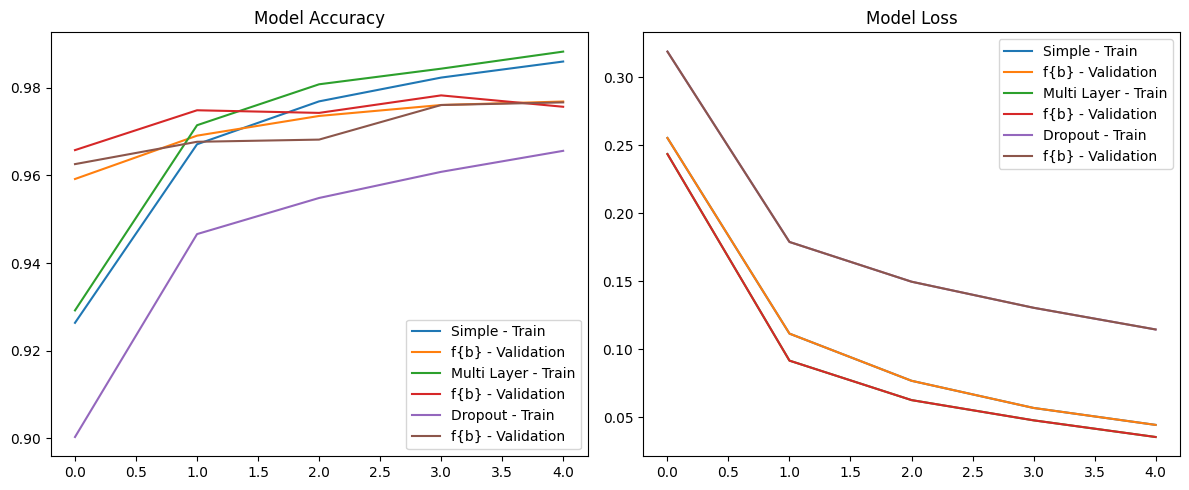

In [11]:
import matplotlib.pyplot as plt

def plot_metrics(versions, models):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    for a,b in zip(versions, models):
        plt.plot(a.history['accuracy'], label=f'{b} - Train')
        plt.plot(a.history['val_accuracy'], label='f{b} - Validation')
    plt.title('Model Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    for a,b in zip(versions, models):
        plt.plot(a.history['loss'], label=f'{b} - Train')
        plt.plot(a.history['loss'], label='f{b} - Validation')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

versions = [v1, v2, v3]
models = ['Simple', 'Multi Layer', 'Dropout']

plot_metrics(versions, models)

In [13]:
import numpy as np

image = X_test[0]

prediction = model1.predict(np.expand_dims(image, axis=0))
predicted_class = prediction.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


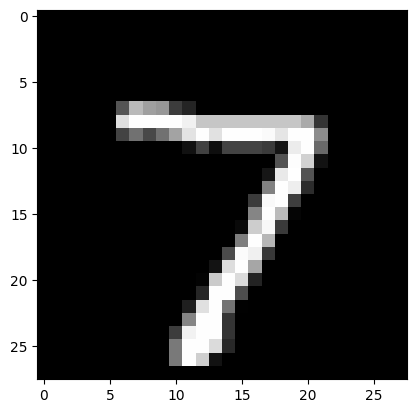

In [14]:
plt.imshow(image, cmap='gray')